In [2]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os 
from matplotlib_venn import venn3


In [3]:
# Create a data frame with given columns and value

file = os.path.join("heart_disease_health_indicators_BRFSS2015.csv")
ac_original_df = pd.read_csv(file)
ac_original_df.head(20)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4
5,0,1,1,1,25,1,0,0,1,1,...,1,0,2,0,2,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,...,1,0,3,0,14,0,0,9,6,7
7,0,1,1,1,25,1,0,0,1,0,...,1,0,3,0,0,1,0,11,4,4
8,1,1,1,1,30,1,0,2,0,1,...,1,0,5,30,30,1,0,9,5,1
9,0,0,0,1,24,0,0,0,0,0,...,1,0,2,0,0,0,1,8,4,3


In [4]:
##Get the shape of DF
ac_original_df.shape


(253680, 22)

In [5]:
#---------------------inspect whether value in the columns fall within the excpected range-------------------------------#
ac_original_df.nunique()

HeartDiseaseorAttack     2
HighBP                   2
HighChol                 2
CholCheck                2
BMI                     84
Smoker                   2
Stroke                   2
Diabetes                 3
PhysActivity             2
Fruits                   2
Veggies                  2
HvyAlcoholConsump        2
AnyHealthcare            2
NoDocbcCost              2
GenHlth                  5
MentHlth                31
PhysHlth                31
DiffWalk                 2
Sex                      2
Age                     13
Education                6
Income                   8
dtype: int64

In [6]:
## expected value 0 or 1 for the following columns :
## HeartDiseaseorAttack, HighChol, CholCheck, Smoker, Stroke,PhysActivity, Fruits,Veggies
## HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk,Sex,  

## after inspection of number of data above and skimming the first 20 rows, the values in
## above mentioned columns are within expected range
#referred to 2015 BRFSS Codebook and the source's footnote

In [7]:
## data exploration, and, if necessary, clean up for the rest of the columns
##-----------------------------------------BMI-----------------------------------------------------##
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the BMI

ac_BMIsummary_table = ac_original_df.agg({"BMI":["mean","median","var","std","sem"]}).round(decimals=2)
ac_BMIsummary_table



,BMI
mean,28.38
median,27.00
var,43.67
std,6.61
sem,0.01


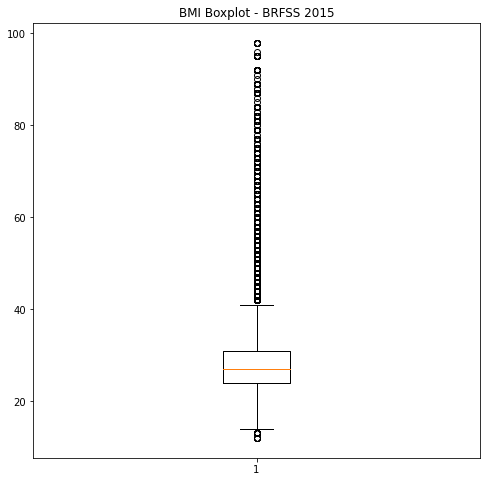

In [8]:


# Generate a box plot of the BMI data 
plt.boxplot(x = ac_original_df["BMI"])
plt.title('BMI Boxplot - BRFSS 2015')
plt.gcf().set_size_inches(8,8)
plt.show()

# Values of the BMI fall within the expected range, therefore the removal of the outliers will not be necessary
# no null values observed

In [9]:
#Getting the value of Coefficient of Variation for the BMI

Co_Var=(ac_BMIsummary_table.iloc[3,0]/ac_BMIsummary_table.iloc[0,0]).round(decimals=2)
Co_Var

#CV yields value <1 showing low variability in the data set

0.23

In [10]:
## Diabetes column, expected value 0, 1 or 2
ac_original_df["Diabetes"].value_counts()

0    213703
2     35346
1      4631
Name: Diabetes, dtype: int64

In [11]:
## MentHlth column, expected value within the range of 0-30
ac_MentHlth = ac_original_df["MentHlth"].value_counts().sort_index()
print(ac_MentHlth)

0     175680
1       8538
2      13054
3       7381
4       3789
5       9030
6        988
7       3100
8        639
9         91
10      6373
11        41
12       398
13        41
14      1167
15      5505
16        88
17        54
18        97
19        16
20      3364
21       227
22        63
23        38
24        33
25      1188
26        45
27        79
28       327
29       158
30     12088
Name: MentHlth, dtype: int64


In [12]:
## PhysHlth  column, expected value within the range of 0-30
ac_PhysHlth = ac_original_df["MentHlth"].value_counts().sort_index()
print(ac_PhysHlth )

0     175680
1       8538
2      13054
3       7381
4       3789
5       9030
6        988
7       3100
8        639
9         91
10      6373
11        41
12       398
13        41
14      1167
15      5505
16        88
17        54
18        97
19        16
20      3364
21       227
22        63
23        38
24        33
25      1188
26        45
27        79
28       327
29       158
30     12088
Name: MentHlth, dtype: int64


In [13]:
## Age  column, expected value within the range of 1-13
ac_age = ac_original_df["Age"].value_counts().sort_index()
print(ac_age )

1      5700
2      7598
3     11123
4     13823
5     16157
6     19819
7     26314
8     30832
9     33244
10    32194
11    23533
12    15980
13    17363
Name: Age, dtype: int64


In [14]:
## Education column, expected value within the range of 1-6
ac_ed = ac_original_df["Education"].value_counts().sort_index()
print(ac_ed )

1       174
2      4043
3      9478
4     62750
5     69910
6    107325
Name: Education, dtype: int64


In [15]:
## Income column, expected value within the range of 1-8
ac_inc = ac_original_df["Income"].value_counts().sort_index()
print(ac_inc )

1     9811
2    11783
3    15994
4    20135
5    25883
6    36470
7    43219
8    90385
Name: Income, dtype: int64


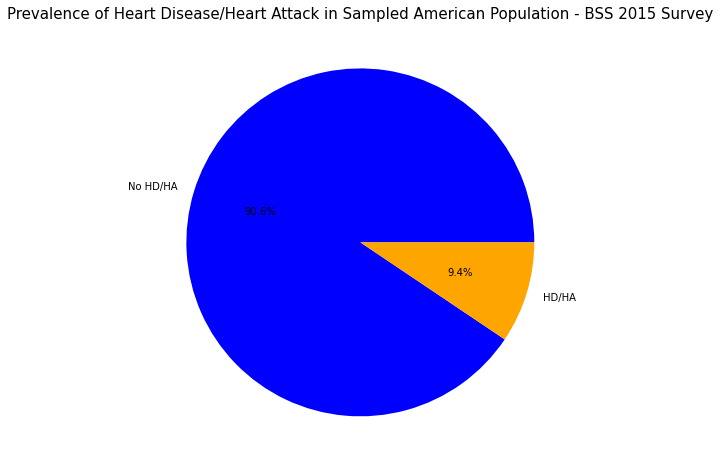

In [16]:
ac_hdha_prev = ac_original_df["HeartDiseaseorAttack"].value_counts()
plt.pie(ac_hdha_prev, labels= ("No HD/HA", "HD/HA"), colors= ["blue", "orange"]
        , autopct="%1.1f%%", startangle=0)
plt.gcf().set_size_inches(8,8)
plt.title('Prevalence of Heart Disease/Heart Attack in Sampled American Population - BSS 2015 Survey', fontsize=15)
plt.savefig('hdha_prev.png', dpi=300, bbox_inches='tight')
plt.show()

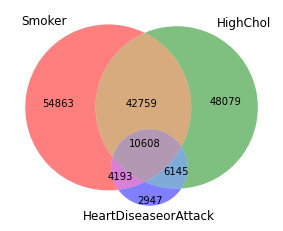

In [18]:
## we are interested in exploring the overlap among sampled population with HD/HA, smoking, high Cholesterol, Diabetes
## in people who have already HA/HD


ac_venn_int1= len(ac_original_df.loc[(ac_original_df["HighChol"] == 1) & (ac_original_df["Smoker"] == 1)& (ac_original_df["HeartDiseaseorAttack"] == 1)])
ac_venn_int2= len(ac_original_df.loc[(ac_original_df["Smoker"] == 1)& (ac_original_df["HeartDiseaseorAttack"] == 1)])-ac_venn_int1
ac_venn_int3= len(ac_original_df.loc[(ac_original_df["HighChol"] == 1)& (ac_original_df["HeartDiseaseorAttack"] == 1)])-ac_venn_int1
ac_venn4= len(ac_original_df.loc[(ac_original_df["HighChol"] == 1)& (ac_original_df["Smoker"] == 1)])-ac_venn_int1
ac_venn5= len(ac_original_df.loc[(ac_original_df["HeartDiseaseorAttack"] == 1) & (ac_original_df["Smoker"] != 1)& (ac_original_df["HighChol"] != 1)])
ac_venn6= len(ac_original_df.loc[(ac_original_df["HighChol"] == 1) & (ac_original_df["Smoker"] != 1)& (ac_original_df["HeartDiseaseorAttack"] != 1)])
ac_venn7= len(ac_original_df.loc[(ac_original_df["Smoker"] == 1) & (ac_original_df["HighChol"] != 1)& (ac_original_df["HeartDiseaseorAttack"] != 1)])

venn3(subsets = (ac_venn7, ac_venn6, ac_venn4, ac_venn5, ac_venn_int2, ac_venn_int3, ac_venn_int1), set_labels = ('Smoker', 'HighChol', 'HeartDiseaseorAttack'), alpha = 0.5)
plt.savefig('venn.png')

In [39]:
ac_hdha_prev

0    229787
1     23893
Name: HeartDiseaseorAttack, dtype: int64

In [41]:
print(str(10608+4193+2947+6145))

23893
